DSCI 352 Tara Erberich Student ID: 9237580532

1. Decision Trees as Interpretable Models

a) Download the Accute Inamations data.

In [104]:
# install plotly
#conda install -c https://conda.anaconda.org/plotly plotly

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, confusion_matrix, classification_report  
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization 
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

# Load data

#a1 Temperature of patient { 35C-42C } 
#a2 Occurrence of nausea { yes, no } 
#a3 Lumbar pain { yes, no } 
#a4 Urine pushing (continuous need for urination) { yes, no } 
#a5 Micturition pains { yes, no } 
#a6 Burning of urethra, itch, swelling of urethra outlet { yes, no } 
#d1 decision: Inflammation of urinary bladder { yes, no } 
#d2 decision: Nephritis of renal pelvis origin { yes, no }

# add headers
header = ["A1", "A2", "A3", "A4", "A5", "A6", "D1", "D2"]

acData = pd.read_csv("Lab 5 Data/diagnosis.data", header = None, names = header, sep = "\t", decimal = ",", encoding = 'utf-16');

# replace no with 0 & yes with 1
acData = acData.replace('no', 0)
acData = acData.replace('yes', 1)

acData

,A1,A2,A3,A4,A5,A6,D1,D2
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


1.b

Build a decision tree on the whole set and plot it

In [50]:
# split data A1 - A6 X and D1 - D2 Y

x = acData[["A1", "A2", "A3", "A4", "A5", "A6"]]
y = acData[["D1", "D2"]]

# Build Tree
acTree = tree.DecisionTreeClassifier()
acTree = acTree.fit(x,y)

# Plot Tree


#fig = px.scatter(df, x=exog, y=endog, opacity=0.8, color_discrete_sequence=['black'])
#fig.update_layout(title=dict(text="Police Per Capita vs OP_NMU_EVER ", font=dict(color='black')))

[Text(133.92000000000002, 195.696, 'X[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(66.96000000000001, 152.208, 'X[2] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(33.480000000000004, 108.72, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(100.44000000000001, 108.72, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(200.88000000000002, 152.208, 'X[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(167.40000000000003, 108.72, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(234.36, 108.72, 'X[4] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(200.88000000000002, 65.232, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(267.84000000000003, 65.232, 'X[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(234.36, 21.744, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(301.32000000000005, 2

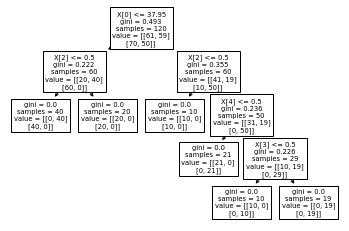

In [51]:
tree.plot_tree(acTree)

1.c

Convert Decision rules into a set of IF-THEN Rules

In [28]:
import numpy as np
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [feature_names[i] 
                    if i != _tree.TREE_UNDEFINED else "undefined!" 
                    for i in tree_.feature]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, np.argmax(tree_.value[node])))

    recurse(0, 1)

In [29]:
feature_names = x.columns
tree_to_code(acTree, feature_names)

def tree(A1, A2, A3, A4, A5, A6):
    if A1 <= 37.95000076293945:
        if A3 <= 0.5:
            return 1
        else:  # if A3 > 0.5
            return 0
    else:  # if A1 > 37.95000076293945
        if A3 <= 0.5:
            return 0
        else:  # if A3 > 0.5
            if A5 <= 0.5:
                return 0
            else:  # if A5 > 0.5
                if A4 <= 0.5:
                    return 0
                else:  # if A4 > 0.5
                    return 1


1.d(extra credit)

Use cost-complexity pruning to find a minimal decision
tree and a set of decision rules with high interpretability.

2. Random Forests, Ridge Regularized, and LASSO Regularized Regression

a) Download the Communities and Crime data3. Use the first 1495 rows of data as the training set and the rest as the test set.

In [32]:
header = ["A1", "A2", "A3", "A4", "A5", "A6", "D1", "D2"]

ccData = pd.read_csv("Lab 5 Data/communities.data", header = None);

# Replace ? with NaN for imputer to work
ccData = ccData.replace('?', 'NaN')

# Split data for train and test
x_train = ccData.iloc[0:1495, 0:127]
y_train = ccData.iloc[0:1495, 127:128]

x_test = ccData.iloc[1495:, 0:127]
y_test = ccData.iloc[1495:, 127:128]


2.b

The data set has missing values. Use a simple data imputation technique (using the mean or median statistic of each feature) to deal with the missing values in the data set. The data description mentions that five features are nonpredictive. Ignore those features.

In [33]:

# convert to DF
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

# Ignore nonpredictive features (0:4)
x_train = x_train.iloc[:, 5:127]
x_test = x_test.iloc[:, 5:127]

x_train = x_train.apply(pd.to_numeric, errors = 'coerce')
#x_test = x_test.apply(pd.to_numeric, errors = 'coerce')

mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
mean.fit(x_train)

x_train = mean.transform(x_train)
print(x_train)

x_test = mean.transform(x_test)
print(x_test)

[[0.19       0.33       0.02       ... 0.5        0.32       0.14      ]
 [0.         0.16       0.12       ... 0.45188285 0.         0.19075314]
 [0.         0.42       0.49       ... 0.45188285 0.         0.19075314]
 ...
 [0.01       0.36       0.95       ... 0.45188285 0.         0.19075314]
 [0.06       0.53       0.01       ... 0.45188285 0.         0.19075314]
 [0.05       0.43       0.08       ... 0.         0.51       0.18      ]]
[[0.         0.2        0.03       ... 0.45188285 0.         0.19075314]
 [0.         0.55       0.13       ... 0.45188285 0.         0.19075314]
 [0.         0.52       0.04       ... 0.45188285 0.         0.19075314]
 ...
 [0.16       0.37       0.25       ... 0.         0.91       0.28      ]
 [0.08       0.51       0.06       ... 0.         0.22       0.18      ]
 [0.2        0.78       0.14       ... 0.5        1.         0.13      ]]


2.c

Plot a correlation matrix for the features in the data set.

<AxesSubplot:>

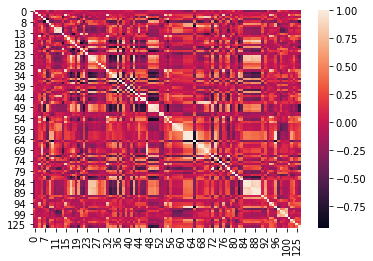

In [37]:
data_corr = ccData.corr()
sb.heatmap(data_corr)


2.d

Calculate the Coefficient of Variation CV for each feature, where CV = s/m, in which s is sample standard deviation and m is sample mean.

In [41]:
m = x_train.mean(axis = 1)

s = x_train.std(axis = 1)

CV = s/m

CV = pd.DataFrame(CV)
print(CV)

             0
0     0.720502
1     0.730688
2     0.689238
3     0.717442
4     0.805281
...        ...
1490  0.821794
1491  0.575229
1492  0.847638
1493  0.798144
1494  0.715099

[1495 rows x 1 columns]


2.e

Pick sqr(122) features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

Top 11 features

              0
1070  1.028018
1032  0.976092
1065  0.950315
1153  0.949235
809   0.945877
1312  0.944156
896   0.939932
1049  0.938521
84    0.937402
1103  0.929035
1429  0.928656



Looking at the scatter plot, I cannot draw a conclusion about the significane of the features




<AxesSubplot:>

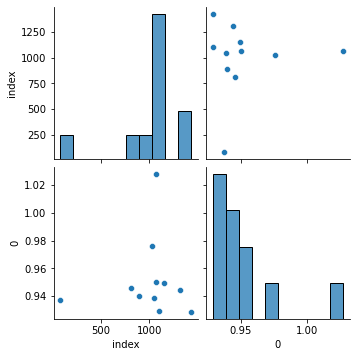

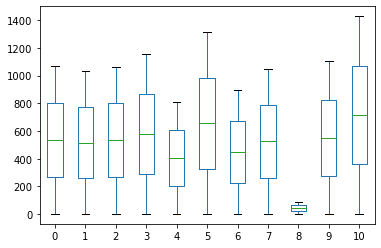

In [49]:
sort_CV = CV.sort_values(by = 0, ascending = False)
sort_CV = pd.DataFrame(sort_CV)
high_CV = sort_CV.head(11).reset_index()
high_CV = pd.DataFrame(high_CV)

print('Top 11 features\n\n', sort_CV.head(11))
print('\n\n')

print('Looking at the scatter plot, I cannot draw a conclusion about the significane of the features\n\n')
sb.pairplot(data = high_CV)
high_CV = high_CV.transpose()
high_CV.plot(kind='box')


2.f

Fit a linear model using least squares to the training set and report the test error.

In [10]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression().fit(x_train, y_train)
pred_testLR = lin.predict(x_test)

mse = mean_squared_error(y_test, pred_testLR)

print('Linear Model Test Error\n', mse)

Linear Model Test Error
 0.01814197113553011


2.g

Fit a ridge regression model on the training set, with v chosen by 5-fold cross-validation. Report the test error obtained.

In [28]:
from sklearn.linear_model import RidgeCV

rCV = RidgeCV(cv = 5).fit(x_train, y_train)

pred_testCV = rCV.predict(x_test)

mse = mean_squared_error(y_test, pred_testCV)

print('Ridge Regression Model Test Error\n', mse)



Ridge Regression Model Test Error
 0.01773247499289664


2.h

Fit a LASSO model on the training set, with v chosen by 5-fold cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized4 features. Report the test error for both cases and compare them.

In [39]:
from sklearn.linear_model import LassoCV
from sklearn import preprocessing


lasCV = LassoCV(cv=5).fit(x_train, y_train)
pred_testLas = lasCV.predict(x_test)

mse = mean_squared_error(y_test, pred_testLas)
print('Non-Standardized MSE \n', mse)
print('\n \n ')
coef = lasCV.coef_
print('Model Selected Variables(all 0 values were not selected) \n', coef)
print('\n \n ')
scaler_test = preprocessing.StandardScaler().fit_transform(x_test)
scaler_train = preprocessing.StandardScaler().fit_transform(x_train)
lasCV = LassoCV(cv=5).fit(scaler_train, y_train.values.ravel())
pred_testStand = lasCV.predict(scaler_test)
mseStand = mean_squared_error(y_test, pred_testStand)
print('Standardized MSE \n', mseStand)
print('\n \n ')
print('The MSE for non-standardized data was lower, which tells us we do not need to standardize the data beforehand')

/Users/tara/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/tara/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009752930225996437, tolerance: 0.006746416078595318
  model = cd_fast.enet_coordinate_descent_gram(
/Users/tara/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010113610151087471, tolerance: 0.006746416078595318
  model = cd_fast.enet_coordinate_descent_gram(


Non-Standardized MSE 
 0.017758209216319674

 
 
Model Selected Variables(all 0 values were not selected) 
 [-0.          0.          0.27198384 -0.         -0.01567076  0.
  0.0666577  -0.26537253  0.          0.         -0.          0.04051248
  0.         -0.08481132  0.02660694 -0.09851161  0.04856023  0.03886807
 -0.10843093  0.         -0.         -0.0580192  -0.02105596 -0.03113087
  0.02900207  0.02269291  0.02395003 -0.         -0.14118798 -0.01835354
  0.          0.         -0.          0.13739397 -0.01567272  0.
  0.01010228  0.          0.11806912  0.13317242 -0.07861242 -0.
  0.         -0.         -0.19660029 -0.03766618 -0.01023067  0.
 -0.12947621 -0.05386363  0.09848014 -0.07037142 -0.         -0.
 -0.         -0.00499029 -0.          0.          0.          0.03753306
  0.         -0.07071252 -0.         -0.06485658  0.04186758 -0.
 -0.         -0.05733126  0.21902748  0.05689623  0.00347676  0.12420479
 -0.06045463  0.          0.07343127 -0.0599405  -0.01577883  0.

/Users/tara/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009826702372112806, tolerance: 0.006746416078595318
  model = cd_fast.enet_coordinate_descent_gram(
/Users/tara/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01021130700044992, tolerance: 0.006746416078595318
  model = cd_fast.enet_coordinate_descent_gram(
/Users/tara/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009981166735219205, tolerance: 0.006746416078595318
  model = cd_fast.enet_coordinate_descent_gram(
/Users/tara/opt/anaconda3/lib/python3.8/site

2.i 

Fit random forest models to the training set using m = sqr(123) and m = 122 and plot the train, out of bag (OOB), and test errors for B{1,2..., 300} on the same plot and compare them.

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor


# Features @ 11
oob1 = []
oob = []
mse = []
mse1 = []
for k in range (1, 300, 1):
    #print(k)
    RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
    pred_testRandF1 = RandF1.predict(x_test)
    oob1.append(RandF1.oob_score_)
    mse1.append(mean_squared_error(y_test, pred_testRandF1))

# Features @ 122
    RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)
    pred_testRandF = RandF.predict(x_test)
    oob.append(RandF.oob_score_)
    mse.append(mean_squared_error(y_test, pred_testRandF))





1


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


2


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


3


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


4


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


5


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


6


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


7


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


8


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


9


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


10


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


11


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


12


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


13


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


14


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


15


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


16


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


17


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


18


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


19


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


20


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


21


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


22


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


23


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


24


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


25


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


26


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


27


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


28


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


29


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


30


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


31


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


32


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


33


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


34


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


35


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


36


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


37


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


38


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


39


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


40


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


41


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


42


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


43


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


44


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


45


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


46


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


47


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


48


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


49


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


50


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


51


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


52


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


53


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


54


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


55


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


56


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


57


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


58


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


59


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


60


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


61


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


62


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


63


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


64


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


65


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


66


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


67


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


68


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


69


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


70


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


71


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


72


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)


73


<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


74


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


75


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


76


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


77


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


78


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


79


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


80


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


81


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


82


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


83


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


84


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


85


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


86


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


87


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


88


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


89


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


90


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


91


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


92


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


93


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


94


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


95


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


96


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


97


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


98


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


99


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


100


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


101


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


102


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


103


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


104


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


105


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


106


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


107


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


108


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


109


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


110


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


111


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


112


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


113


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


114


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


115


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


116


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


117


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


118


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


119


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


120


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


121


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


122


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


123


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


124


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


125


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


126


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


127


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


128


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


129


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


130


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


131


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


132


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


133


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


134


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


135


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


136


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


137


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


138


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)


139


<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)


140


<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


141


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


142


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


143


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


144


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


145


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


146


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


147


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


148


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


149


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


150


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


151


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


152


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


153


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


154


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


155


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


156


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


157


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


158


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


159


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


160


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


161


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


162


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


163


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


164


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


165


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


166


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


167


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


168


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


169


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


170


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


171


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


172


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


173


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


174


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


175


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


176


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


177


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


178


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


179


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


180


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


181


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


182


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


183


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


184


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


185


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


186


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


187


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


188


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


189


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


190


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


191


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


192


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


193


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


194


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


195


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


196


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


197


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


198


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


199


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


200


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


201


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


202


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


203


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


204


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


205


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


206


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


207


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


208


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


209


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


210


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


211


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


212


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


213


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


214


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


215


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


216


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


217


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


218


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


219


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


220


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


221


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


222


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


223


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


224


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


225


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


226


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


227


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


228


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


229


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


230


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


231


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


232


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


233


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


234


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


235


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


236


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


237


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


238


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


239


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


240


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


241


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


242


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


243


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


244


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


245


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


246


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


247


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


248


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


249


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


250


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


251


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


252


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


253


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


254


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


255


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


256


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


257


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


258


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


259


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


260


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


261


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


262


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


263


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


264


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


265


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


266


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


267


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


268


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


269


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


270


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


271


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


272


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


273


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


274


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


275


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


276


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


277


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


278


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


279


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


280


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


281


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


282


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


283


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


284


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


285


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


286


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


287


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


288


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


289


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


290


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


291


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


292


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


293


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


294


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


295


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


296


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


297


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


298


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


299


<ipython-input-11-f28a9ce02c17>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF1 = RandomForestRegressor(max_features = 11, oob_score = True, max_samples = k).fit(x_train, y_train)
<ipython-input-11-f28a9ce02c17>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandF = RandomForestRegressor(max_features = 122, oob_score = True, max_samples = k).fit(x_train, y_train)


[0.04803053184368737, 0.041035964849699416, 0.039515089739478954, 0.037603670961923845, 0.035078113787575145, 0.02958361569138276, 0.028666052685370737, 0.02774453172344689, 0.026843699398797587, 0.02575466194388777, 0.023992857134268544, 0.023112760060120238, 0.02314369170340681, 0.021954539679358714, 0.023699299659318638, 0.021889924388777557, 0.02193895370741483, 0.02060915114228457, 0.02020078893787575, 0.02001515521042084, 0.021107161503006008, 0.019734088777555107, 0.019579211382765523, 0.019484876713426857, 0.01981382629258517, 0.01863038174348697, 0.0200904670741483, 0.01885010841683367, 0.01918726865731463, 0.01892654925851703, 0.01936969188376753, 0.019310130881763525, 0.018529658657314627, 0.01903063424849699, 0.018685113366733466, 0.018309476252505005, 0.01862994206412826, 0.018559119899799595, 0.019023103366733463, 0.01788120953907816, 0.017975841322645292, 0.0186906449498998, 0.01827654929859719, 0.018754548116232467, 0.018389349959919837, 0.018482619038076156, 0.01826243

Text(0, 0.5, 'MSE')

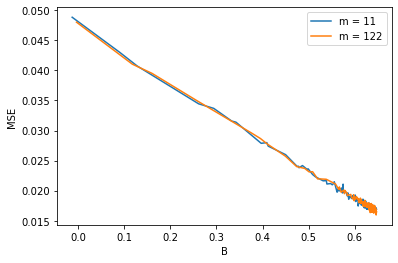

In [35]:
#sb.lineplot(x = x_train, y = y_train)
sb.lineplot(x = oob1, y = mse1, label = "m = 11")
sb.lineplot(x = oob, y = mse, label = "m = 122")
plt.xlabel('B')
plt.ylabel('MSE')


2.j

Build a variable importance plot (see p. 319 of ISLR) from your random forest. If the variable importance plot is hard to read, only keep the top 10 most important features.

In [38]:
# Find Important Features

print("Feature Importance")
FI = RandF1.feature_importances_
FI = pd.DataFrame(FI)


Feature Importance


NameError: name 'RandF1' is not defined

In [21]:
FI

NameError: name 'FI' is not defined

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121]


<AxesSubplot:>

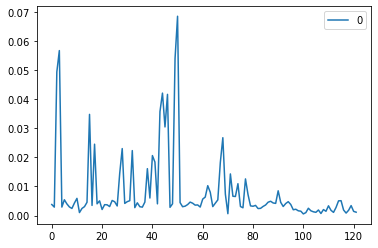

In [28]:
# Variable Importance Plot

FI.plot()